## 1) Choose a dataset

In [1]:
# Import all the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [2]:
# Import warnings and apply the setting to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the dataset
df = pd.read_csv(r'breast-cancer-wisconsin.csv',header=None)
df_names = pd.read_csv(r'header_names.csv',header=None)
df.columns = df_names[0]

## 2) Explore the data set and select two or more features for data analysis

### a) Exploratory data analysis

In [4]:
df.head() # Look at the first five rows

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.tail() # Look at the last five rows

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [6]:
df.shape # Look at the dimensions of the data set

(699, 11)

In [7]:
df.dtypes # Look at the data types of the different variables in the data set

0
Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [8]:
df.describe().T # Look at the summary statistics of the data set

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
Sample code number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bland Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


In [9]:
df.Class.unique() # Obtain the labels for benign and malignant tumours and check that there are just two labels

array([2, 4], dtype=int64)

In [10]:
df['Class'] = df['Class'].map({4:'M', 2:'B'}) # Temporarily transform the class variable to categorical variables

In [11]:
df.Class.value_counts() # Obtain the total number of benign and malignant tumours after transformation

Class
B    458
M    241
Name: count, dtype: int64

### Remove columns which are not relevant or those which are not integers

In [12]:
df.drop('Sample code number',axis=1, inplace=True)
df.drop('Bare Nuclei', axis=1, inplace=True)
df.head() # Look at first five rows after data cleaning

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,3,1,1,B
1,5,4,4,5,7,3,2,1,B
2,3,1,1,1,2,3,1,1,B
3,6,8,8,1,3,3,7,1,B
4,4,1,1,3,2,3,1,1,B


In [13]:
df.tail() # Look at last five rows after data cleaning

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
694,3,1,1,1,3,1,1,1,B
695,2,1,1,1,2,1,1,1,B
696,5,10,10,3,7,8,10,2,M
697,4,8,6,4,3,10,6,1,M
698,4,8,8,5,4,10,4,1,M


In [14]:
df.describe().T # Look at summary statistics after data cleaning

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
Clump Thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bland Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0


### b) Select two or more features for data analysis

<Figure size 1200x600 with 0 Axes>

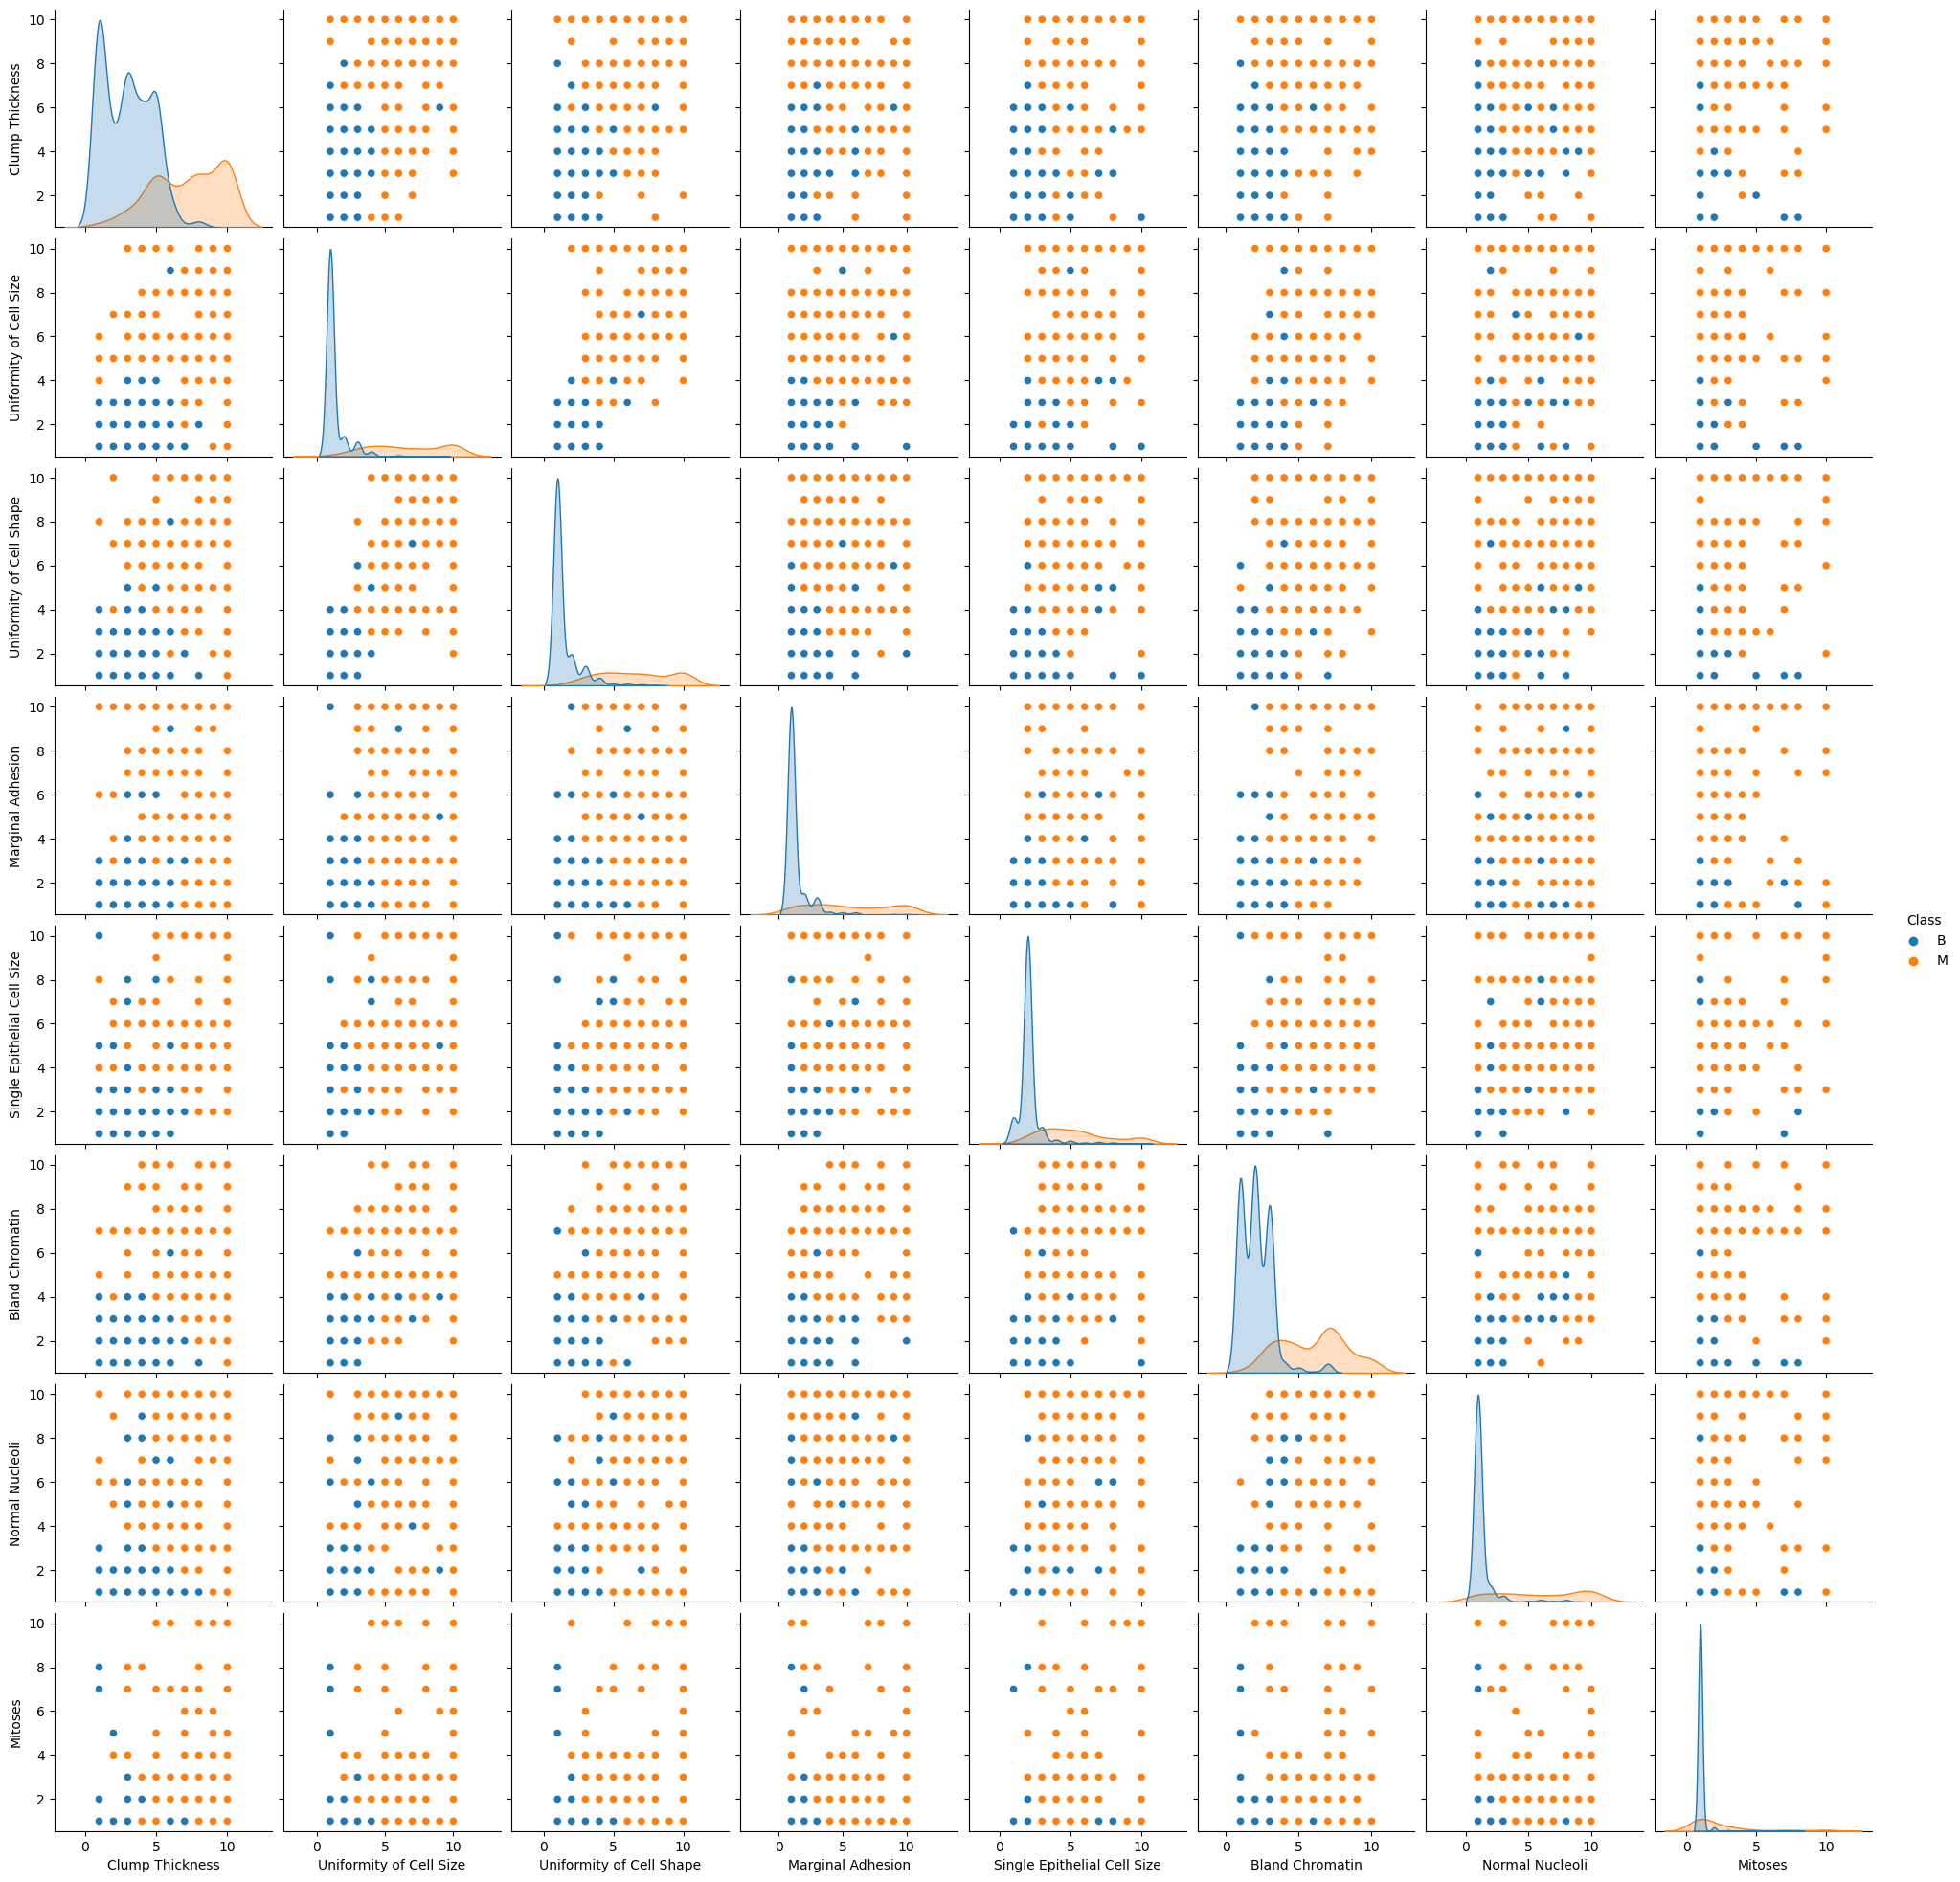

In [15]:
# Create a pairplot to visualize the variables that have good spatial separation between benign and malignant tumours
plt.figure(figsize=(12,6))
sns.pairplot(df, hue="Class")

### Perform further visualization on the variables that appear to have the best separation

<Axes: xlabel='Class', ylabel='Uniformity of Cell Size'>

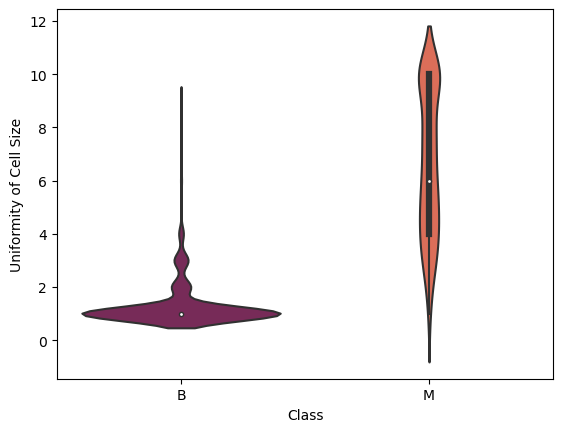

In [16]:
sns.violinplot(x='Class', y='Uniformity of Cell Size', data=df, palette='rocket')

<Axes: xlabel='Class', ylabel='Uniformity of Cell Shape'>

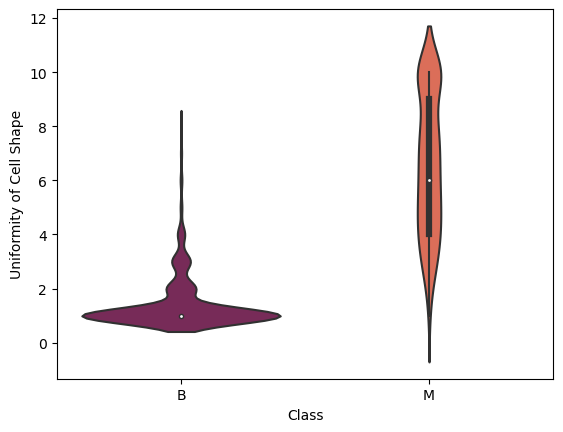

In [17]:
sns.violinplot(x='Class', y='Uniformity of Cell Shape', data=df, palette='rocket')

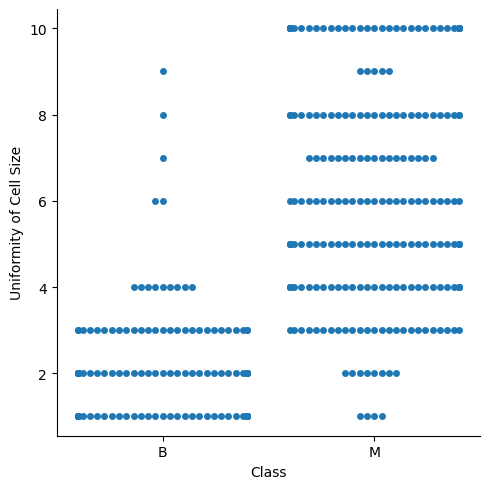

In [18]:
sns.catplot(x='Class', y='Uniformity of Cell Size', kind='swarm', data=df)

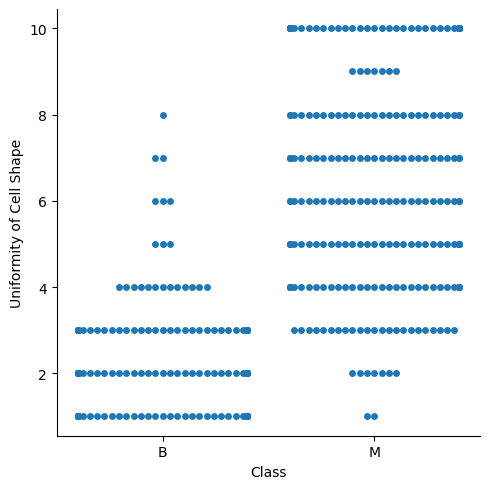

In [19]:
sns.catplot(x='Class', y='Uniformity of Cell Shape', kind='swarm', data=df)

In [20]:
df['Class'] = df['Class'].map({'M':4, 'B':2}) # Convert the class variables back to integers

In [21]:
df.head() # Visualize first five rows after the transformation

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,3,1,1,2
1,5,4,4,5,7,3,2,1,2
2,3,1,1,1,2,3,1,1,2
3,6,8,8,1,3,3,7,1,2
4,4,1,1,3,2,3,1,1,2


In [22]:
df.dtypes # Check that all the data types are integers

0
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [23]:
df.isnull().sum() # Check if the data set has any NaN values

0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

### Split dataset based on the class of the tumour

In [24]:
benign = df['Class'] == 2
malignant = df['Class'] == 4
df_benign = df[benign]
df_malignant = df[malignant]

In [25]:
df_benign.describe().T # Look at the summary statistics for the benign tumour

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
Clump Thickness,458.0,2.956332,1.674318,1.0,1.0,3.0,4.0,8.0
Uniformity of Cell Size,458.0,1.325328,0.907694,1.0,1.0,1.0,1.0,9.0
Uniformity of Cell Shape,458.0,1.443231,0.997836,1.0,1.0,1.0,1.0,8.0
Marginal Adhesion,458.0,1.364629,0.996830,1.0,1.0,1.0,1.0,10.0
Single Epithelial Cell Size,458.0,2.120087,0.917130,1.0,2.0,2.0,2.0,10.0
Bland Chromatin,458.0,2.100437,1.080339,1.0,1.0,2.0,3.0,7.0
Normal Nucleoli,458.0,1.290393,1.058856,1.0,1.0,1.0,1.0,9.0
Mitoses,458.0,1.063319,0.501995,1.0,1.0,1.0,1.0,8.0
Class,458.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


In [26]:
df_malignant.describe().T # Look at the summary statistics for the malignant tumour

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
Clump Thickness,241.0,7.195021,2.428849,1.0,5.0,8.0,10.0,10.0
Uniformity of Cell Size,241.0,6.572614,2.719512,1.0,4.0,6.0,10.0,10.0
Uniformity of Cell Shape,241.0,6.560166,2.562045,1.0,4.0,6.0,9.0,10.0
Marginal Adhesion,241.0,5.547718,3.210465,1.0,3.0,5.0,8.0,10.0
Single Epithelial Cell Size,241.0,5.298755,2.451606,1.0,3.0,5.0,6.0,10.0
Bland Chromatin,241.0,5.979253,2.273852,1.0,4.0,7.0,7.0,10.0
Normal Nucleoli,241.0,5.863071,3.350672,1.0,3.0,6.0,10.0,10.0
Mitoses,241.0,2.589212,2.557939,1.0,1.0,1.0,3.0,10.0
Class,241.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0


In [27]:
df_benign_mean = df_benign.mean() # Obtain the mean value of variables for benign tumour
df_benign_std = df_benign.std() # Obtain the standard deviation value of variables for benign tumour
df_malignant_mean = df_malignant.mean() # Obtain the mean value of variables for malignant tumour
df_malignant_std = df_malignant.std() # Obtain the standard deviation value of variables for malignant tumour

### Look at table of metrics that represent separation between the variables

In [28]:
for k in range(len(df_malignant_mean)):
    print(k, df_malignant_mean[k]-df_benign_mean[k], df_benign_std[k], df_malignant_std[k])

0 4.238688869158709 1.6743179398121413 2.4288492001496835
1 5.247286596966786 0.9076940761225283 2.719512251850836
2 5.1169345340557 0.9978357515232849 2.5620447509110393
3 4.183089021362953 0.9968297525550264 3.2104654678185405
4 3.17866785047745 0.9171299497090258 2.4516062987322007
5 3.8788164308104878 1.0803394318937414 2.2738516016883543
6 4.57267752631865 1.0588562935801824 3.3506724000569594
7 1.525892840964685 0.5019954829460961 2.5579385826346837
8 2.0 0.0 0.0


In [29]:
df.columns[2], df.columns[1] # Obtain the name of the variables that appear to have best separation

('Uniformity of Cell Shape', 'Uniformity of Cell Size')

### Perform further visualization on the variables that appear to have the best separation

<Axes: xlabel='Uniformity of Cell Shape', ylabel='Density'>

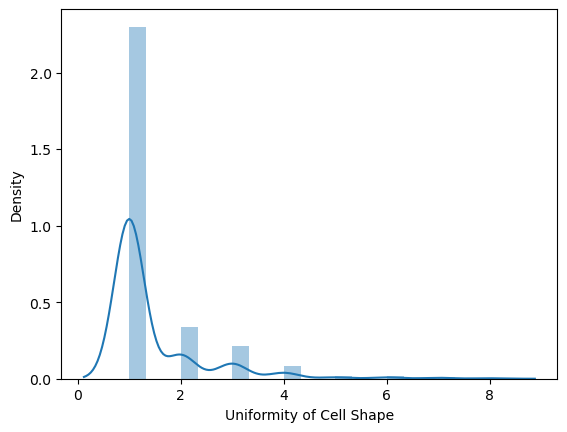

In [30]:
sns.distplot(df_benign['Uniformity of Cell Shape'])

<Axes: xlabel='Uniformity of Cell Shape', ylabel='Density'>

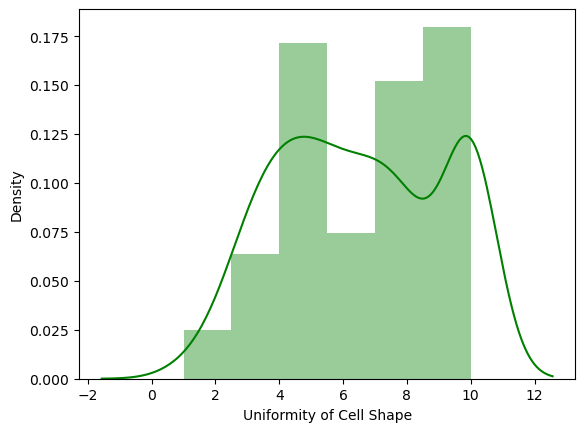

In [31]:
sns.distplot(df_malignant['Uniformity of Cell Shape'], color='g')

<Axes: xlabel='Uniformity of Cell Size', ylabel='Density'>

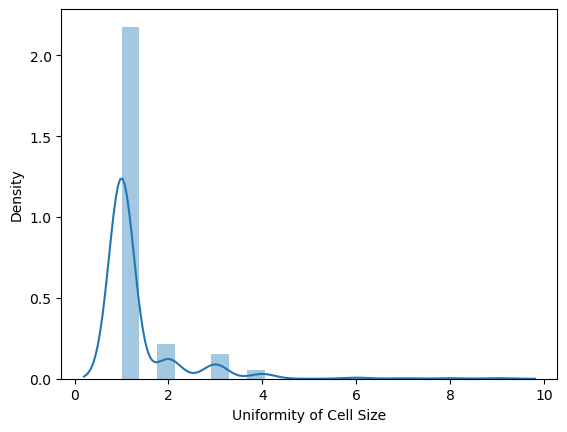

In [32]:
sns.distplot(df_benign['Uniformity of Cell Size'])

<Axes: xlabel='Uniformity of Cell Size', ylabel='Density'>

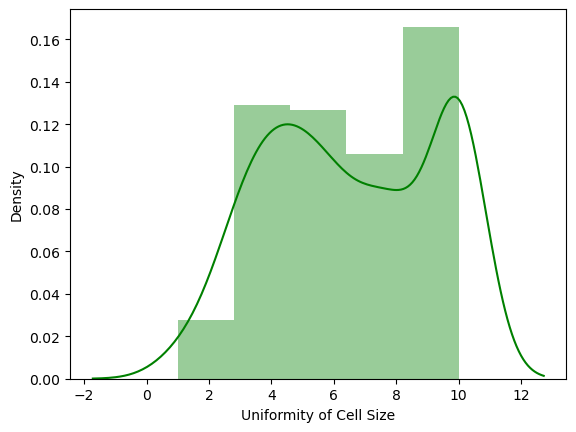

In [33]:
sns.distplot(df_malignant['Uniformity of Cell Size'], color='g')

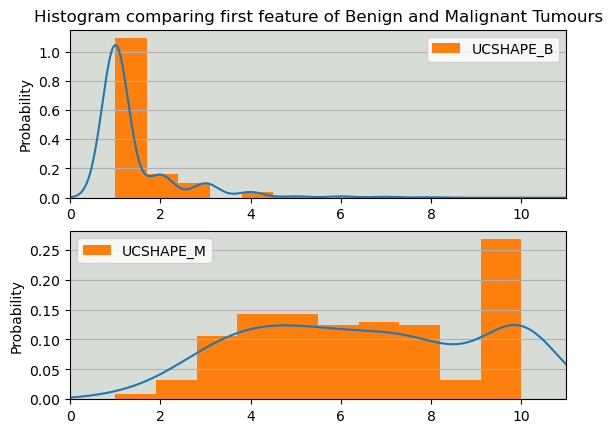

In [34]:
fig, axs = plt.subplots(2)
dist = pd.DataFrame({'UCSHAPE_B':df_benign['Uniformity of Cell Shape'].values})
dist.plot.kde(ax=axs[0], legend=False, title='Histogram comparing first feature of Benign and Malignant Tumours')
dist.plot.hist(density=True, ax=axs[0])
dist_m = pd.DataFrame({'UCSHAPE_M':df_malignant['Uniformity of Cell Shape'].values})
dist_m.plot.kde(ax=axs[1], legend=False)
dist_m.plot.hist(density=True, ax=axs[1])
for j in range(2):
    axs[j].set_ylabel('Probability')
    axs[j].set_xlim(0,11)
    axs[j].grid(axis='y')
    axs[j].set_facecolor('#d8dcd6')

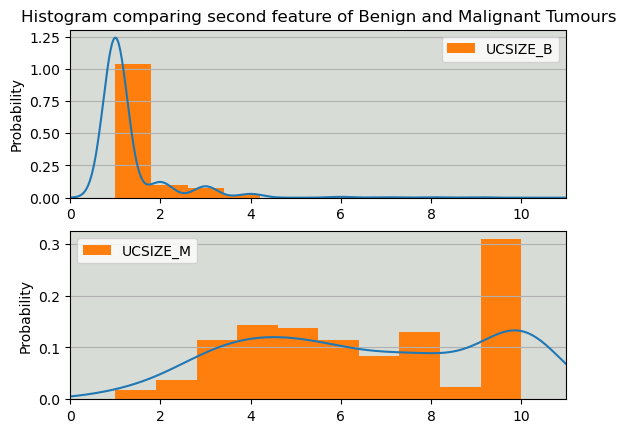

In [35]:
fig, axs = plt.subplots(2)
dist = pd.DataFrame({'UCSIZE_B':df_benign['Uniformity of Cell Size'].values})
dist.plot.kde(ax=axs[0], legend=False, title='Histogram comparing second feature of Benign and Malignant Tumours')
dist.plot.hist(density=True, ax=axs[0])
dist_m = pd.DataFrame({'UCSIZE_M':df_malignant['Uniformity of Cell Size'].values})
dist_m.plot.kde(ax=axs[1], legend=False)
dist_m.plot.hist(density=True, ax=axs[1])
for j in range(2):
    axs[j].set_ylabel('Probability')
    axs[j].set_xlim(0,11)
    axs[j].grid(axis='y')
    axs[j].set_facecolor('#d8dcd6')

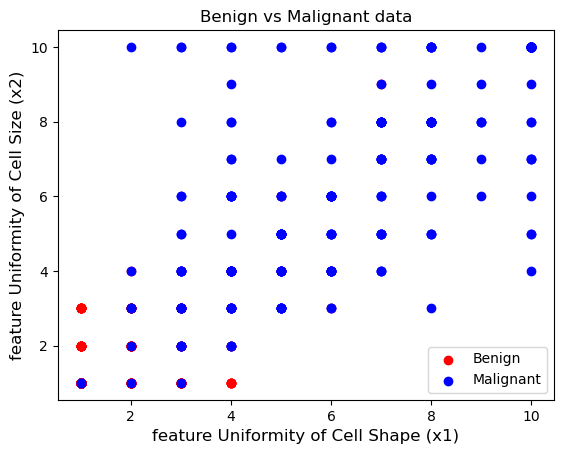

In [36]:
plt.figure()
plt.scatter(df_benign['Uniformity of Cell Shape'], df_benign['Uniformity of Cell Size'], c='r', label='Benign')
plt.scatter(df_malignant['Uniformity of Cell Shape'], df_malignant['Uniformity of Cell Size'], c='b', label='Malignant')
plt.xlabel('feature Uniformity of Cell Shape (x1)', size=12)
plt.ylabel('feature Uniformity of Cell Size (x2)', size=12)
plt.title('Benign vs Malignant data', size= 12)
plt.legend()
plt.show()

## 3) Split the dataset into training, validation and test sets:

In [37]:
X = df[['Uniformity of Cell Shape', 'Uniformity of Cell Size']].values
y_ = df['Class'].values
y = y_==2 # label value for benign tumour
X_t_, X_test_, y_t, y_test = train_test_split(X,y, random_state = 2) # training and test data split 25%
X_train_, X_val_, y_train, y_val = train_test_split(X,y, random_state = 2) # training and validation data split 25%
scaler = StandardScaler() # Perform scaling on variables to avoid ill conditioning

In [38]:
# Tranform training, validation and test data based on standard scaler object
X_t = scaler.fit_transform(X_t_)
X_train = scaler.fit_transform(X_train_)
X_val = scaler.transform(X_val_)
X_test = scaler.fit_transform(X_test_)

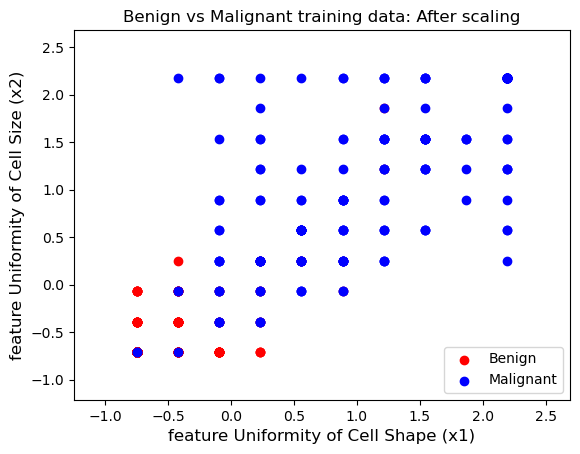

In [39]:
# Plot training data after scaling
x1_min, x1_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
x2_min, x2_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], marker = 'o', c='r', label='Benign')
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1], marker = 'o', c='b', label='Malignant')
plt.xlabel('feature Uniformity of Cell Shape (x1)', size=12)
plt.ylabel('feature Uniformity of Cell Size (x2)', size=12)
plt.title('Benign vs Malignant training data: After scaling', size= 12)
plt.legend()
plt.show()

## 4) and 5) Machine Learning and tuning of hyperparameters

In [40]:
# Choosing hyperparameter C for LSVC using validation data set
C_val_list = [0.00001, 0.00005, 0.0001, 0.0002, 0.0005, 0.0007, 0.0008, 0.001, 0.01, 1.0, 2.0, 10.0, 100.0]
pre_list = []
rec_list = []
f1_list = []
train_acc_list = []
val_acc_list = []
for C_val in C_val_list:
    clf_LSVC = LinearSVC(C=C_val, max_iter=100000)
    clf_LSVC.fit(X_train, y_train)
    y_predict_LSVC = clf_LSVC.predict(X_val)
    pre_val = precision_score(y_true=y_val, y_pred=y_predict_LSVC)
    re_val = recall_score(y_true=y_val, y_pred=y_predict_LSVC)
    f1_val = f1_score(y_true=y_val, y_pred=y_predict_LSVC)
    train_acc_val = clf_LSVC.score(X_train, y_train)*100
    val_acc_val = clf_LSVC.score(X_val, y_val)*100
    train_acc_list.append(train_acc_val)
    val_acc_list.append(val_acc_val)
    rec_list.append(re_val)
    f1_list.append(f1_val)
    pre_list.append(pre_val)
df_metrics = pd.DataFrame(list(zip(C_val_list,train_acc_list, val_acc_list, rec_list, pre_list, f1_list)),
                  columns = ['C','training_acc', 'validation_acc', 'recall', 'precision', 'f1_score'])
df_metrics

,C,training_acc,validation_acc,recall,precision,f1_score
0,0.00001,94.083969,91.428571,0.966942,0.914062,0.939759
1,0.00005,94.083969,91.428571,0.966942,0.914062,0.939759
2,0.00010,94.083969,91.428571,0.966942,0.914062,0.939759
3,0.00020,94.083969,91.428571,0.966942,0.914062,0.939759
4,0.00050,94.083969,91.428571,0.966942,0.914062,0.939759
5,0.00070,92.366412,89.142857,0.975207,0.880597,0.925490
6,0.00080,92.366412,89.142857,0.975207,0.880597,0.925490
7,0.00100,92.366412,89.142857,0.975207,0.880597,0.925490
8,0.01000,94.083969,91.428571,0.966942,0.914062,0.939759
9,1.00000,95.038168,93.142857,0.958678,0.943089,0.950820


In [41]:
# Choosing hyperparameter gamma_RBF for C=1.0
C_val = 1.0 
gamma_rbf_list = [0.00001, 0.00005, 0.0001, 0.0002, 0.0005, 0.0006, 0.0007, 0.0008, 0.001, 0.005, 0.007, 0.01, 0.05, 0.1, 0.5, 1.0]
pre_list = []
rec_list = []
f1_list = []
train_acc_list = []
val_acc_list = []
for gamma_RBF_val in gamma_rbf_list:
    clf_RBF = SVC(kernel='rbf', random_state=0, gamma=gamma_RBF_val, C=C_val)
    clf_RBF.fit(X_train, y_train)
    y_predict_RBF = clf_RBF.predict(X_val)
    pre_val = precision_score(y_true=y_val, y_pred=y_predict_RBF)
    re_val = recall_score(y_true=y_val, y_pred=y_predict_RBF)
    f1_val = f1_score(y_true=y_val, y_pred=y_predict_RBF)
    train_acc_val = clf_RBF.score(X_train, y_train)*100
    val_acc_val = clf_RBF.score(X_val, y_val)*100
    train_acc_list.append(train_acc_val)
    val_acc_list.append(val_acc_val)
    rec_list.append(re_val)
    f1_list.append(f1_val)
    pre_list.append(pre_val)
df_metrics = pd.DataFrame(list(zip(gamma_rbf_list,train_acc_list, val_acc_list, rec_list, pre_list, f1_list)),
                  columns = ['gamma','training_acc', 'validation_acc', 'recall', 'precision', 'f1_score'])
df_metrics

,gamma,training_acc,validation_acc,recall,precision,f1_score
0,0.00001,64.312977,69.142857,1.000000,0.691429,0.817568
1,0.00005,64.312977,69.142857,1.000000,0.691429,0.817568
2,0.00010,64.312977,69.142857,1.000000,0.691429,0.817568
3,0.00020,64.312977,69.142857,1.000000,0.691429,0.817568
4,0.00050,82.824427,82.285714,0.991736,0.800000,0.885609
5,0.00060,87.595420,85.142857,0.975207,0.836879,0.900763
6,0.00070,87.595420,84.571429,0.975207,0.830986,0.897338
7,0.00080,87.022901,84.571429,0.975207,0.830986,0.897338
8,0.00100,87.595420,85.142857,0.975207,0.836879,0.900763
9,0.00500,94.083969,91.428571,0.966942,0.914062,0.939759


In [42]:
C_iter_list = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2.0, 3.0, 5.0, 10.0, 12.0, 20.0, 50.0, 100.0]
for C_iter in C_iter_list:
    gamma_rbf_list = [0.00001, 0.00005, 0.0001, 0.0002, 0.0005, 0.0006, 0.0007, 0.0008, 0.001, 0.005, 0.007, 0.01, 0.05, 0.1, 0.5, 1.0]
    pre_list = []
    rec_list = []
    f1_list = []
    train_acc_list = []
    val_acc_list = []
    C_print_list = []
    for gamma_RBF_val in gamma_rbf_list:
        clf_RBF = SVC(kernel='rbf', random_state=0, gamma=gamma_RBF_val, C=C_iter)
        clf_RBF.fit(X_train, y_train)
        y_predict_RBF = clf_RBF.predict(X_val)
        pre_val = precision_score(y_true=y_val, y_pred=y_predict_RBF)
        re_val = recall_score(y_true=y_val, y_pred=y_predict_RBF)
        f1_val = f1_score(y_true=y_val, y_pred=y_predict_RBF)
        train_acc_val = clf_RBF.score(X_train, y_train)*100
        val_acc_val = clf_RBF.score(X_val, y_val)*100
        train_acc_list.append(train_acc_val)
        val_acc_list.append(val_acc_val)
        rec_list.append(re_val)
        f1_list.append(f1_val)
        pre_list.append(pre_val)
        C_print_list.append(C_iter)
    df_metrics = pd.DataFrame(list(zip(C_print_list, gamma_rbf_list,train_acc_list, val_acc_list, rec_list, pre_list, f1_list)),
                      columns = ['C','gamma','training_acc', 'validation_acc', 'recall', 'precision', 'f1_score'])
    print(df_metrics)

        C    gamma  training_acc  validation_acc  recall  precision  f1_score
0   0.001  0.00001     64.312977       69.142857     1.0   0.691429  0.817568
1   0.001  0.00005     64.312977       69.142857     1.0   0.691429  0.817568
2   0.001  0.00010     64.312977       69.142857     1.0   0.691429  0.817568
3   0.001  0.00020     64.312977       69.142857     1.0   0.691429  0.817568
4   0.001  0.00050     64.312977       69.142857     1.0   0.691429  0.817568
5   0.001  0.00060     64.312977       69.142857     1.0   0.691429  0.817568
6   0.001  0.00070     64.312977       69.142857     1.0   0.691429  0.817568
7   0.001  0.00080     64.312977       69.142857     1.0   0.691429  0.817568
8   0.001  0.00100     64.312977       69.142857     1.0   0.691429  0.817568
9   0.001  0.00500     64.312977       69.142857     1.0   0.691429  0.817568
10  0.001  0.00700     64.312977       69.142857     1.0   0.691429  0.817568
11  0.001  0.01000     64.312977       69.142857     1.0   0.691

In [43]:
gamma_RBF = 0.0006 # Value selected based on hyperparameter tuning using validation data set (above)
C_val = 1.0 # Default value selected based on hyperparameter tuning using validation data set (above)
clf_LSVC = LinearSVC(C=C_val, max_iter=100000)
clf_LSVC.fit(X_train, y_train)
clf_RBF = SVC(kernel='rbf', random_state=0, gamma=gamma_RBF, C=C_val)
clf_RBF.fit(X_train, y_train)

SVC(gamma=0.0006, random_state=0)

### Plots for LSVC

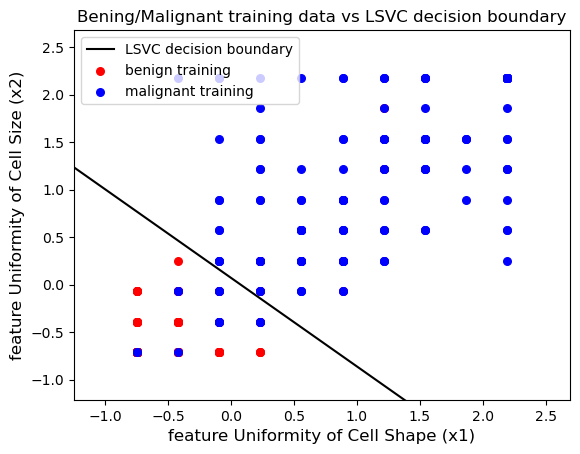

In [44]:
# Training data plot
x1_plot = np.arange(x1_min, x1_max, (x1_max-x1_min)/100.0)
x1_plot = x1_plot.reshape(-1, 1)
LSVC_plot = -(clf_LSVC.coef_[0,0]*x1_plot + clf_LSVC.intercept_[0])/clf_LSVC.coef_[0,1]
plt.plot(x1_plot, LSVC_plot, '-', c='black', label='LSVC decision boundary')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], marker = 'o', c='r', s=30, label='benign training')
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1], marker = 'o', c='b', s=30, label='malignant training')
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.5)
plt.title('Bening/Malignant training data vs LSVC decision boundary', size=12)
plt.xlabel('feature Uniformity of Cell Shape (x1)', size=12)
plt.ylabel('feature Uniformity of Cell Size (x2)', size=12)
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)
plt.show()

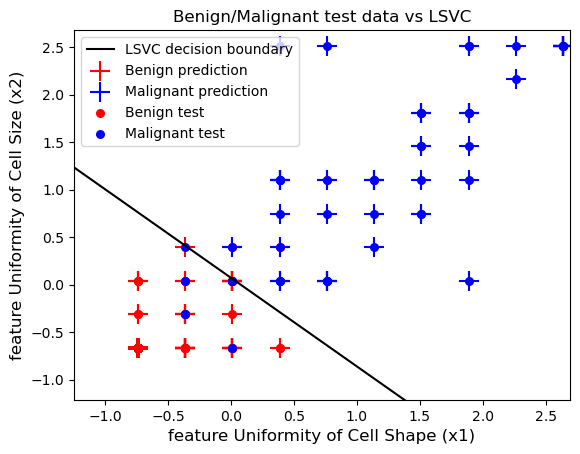

In [45]:
# Test data plot
y_predict = clf_LSVC.predict(X_test)
plt.plot(x1_plot, LSVC_plot, '-', c='black', label='LSVC decision boundary')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.scatter(X_test[y_predict==1,0],X_test[y_predict==1,1], marker = '+', c='r', s=200, label='Benign prediction')
plt.scatter(X_test[y_predict==0,0],X_test[y_predict==0,1], marker = '+', c='b', s=200, label='Malignant prediction')
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1], marker = 'o', c='r', s=30, label='Benign test')
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1], marker = 'o', c='b', s=30, label='Malignant test')
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.5)
plt.title('Benign/Malignant test data vs LSVC', size=12)
plt.xlabel('feature Uniformity of Cell Shape (x1)', size=12)
plt.ylabel('feature Uniformity of Cell Size (x2)', size=12)
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)
plt.show()

### SVC with RBF plots

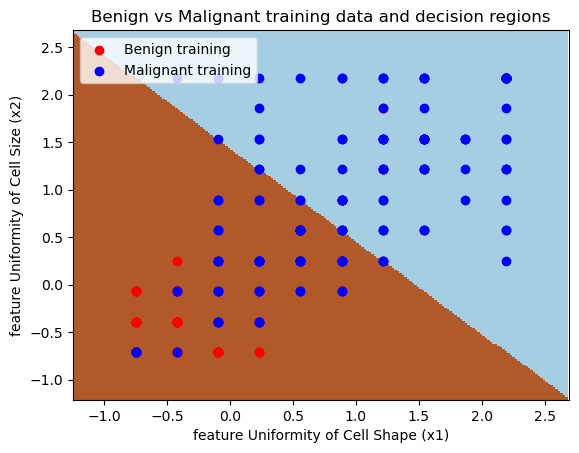

In [46]:
# Training data plots
plt.figure()
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
h = .02
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
Z = clf_RBF.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], marker = 'o', c='r', label='Benign training')
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1], marker = 'o', c='b', label='Malignant training')
plt.title('Benign vs Malignant training data and decision regions')
plt.xlabel('feature Uniformity of Cell Shape (x1)')
plt.ylabel('feature Uniformity of Cell Size (x2)')
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)
plt.show()

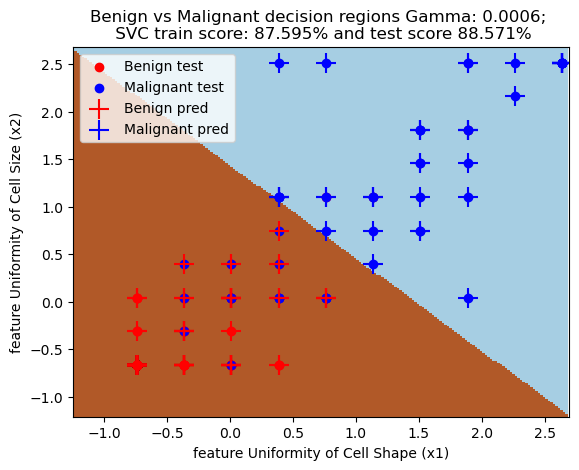

In [47]:
# Test data plots
y_pred = clf_RBF.predict(X_test)
plt.figure()
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1], marker = 'o', c='r', label='Benign test')
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1], marker = 'o', c='b', label='Malignant test')
plt.scatter(X_test[y_pred==1,0],X_test[y_pred==1,1], marker = '+', c='r', s=200, label='Benign pred')
plt.scatter(X_test[y_pred==0,0],X_test[y_pred==0,1], marker = '+', c='b', s=200, label='Malignant pred')
plt.title('Benign vs Malignant decision regions Gamma: {:.4f}; \n SVC train score: {:.3f}% and test score {:.3f}%'
          .format(gamma_RBF, clf_RBF.score(X_train, y_train)*100, clf_RBF.score(X_test, y_test)*100))
plt.xlabel('feature Uniformity of Cell Shape (x1)')
plt.ylabel('feature Uniformity of Cell Size (x2)')
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)
plt.show()

## 6) Use the test set to conduct the final evaluation of the selected best models, and choose a better one as the final decision

In [48]:
len(X_test) # Compute total number of members in the test data set

175

### LSVC report

In [49]:
y_predict_LSVC = clf_LSVC.predict(X_test)
confmat_LSVC = confusion_matrix(y_true=y_test, y_pred=y_predict_LSVC)
print("Confusion Matrix for LSVC below")
print(confmat_LSVC)
print('Precision for LSVC: %.3f' % precision_score(y_true=y_test, y_pred=y_predict_LSVC))
print('Recall for LSVC: %.3f' % recall_score(y_true=y_test, y_pred=y_predict_LSVC))
print('F1 score for LSVC: %.3f' % f1_score(y_true=y_test, y_pred=y_predict_LSVC))
print('Accuracy of LSVC classifier on training set: {:.2f}%'
     .format(clf_LSVC.score(X_train, y_train)*100))
print('Accuracy of LSVC classifier on validation set: {:.2f}%'
     .format(clf_LSVC.score(X_val, y_val)*100))
print('Accuracy of LSVC classifier on test set: {:.2f}%'
     .format(clf_LSVC.score(X_test, y_test)*100))

Confusion Matrix for LSVC below
[[ 47   7]
 [  5 116]]
Precision for LSVC: 0.943
Recall for LSVC: 0.959
F1 score for LSVC: 0.951
Accuracy of LSVC classifier on training set: 95.04%
Accuracy of LSVC classifier on validation set: 93.14%
Accuracy of LSVC classifier on test set: 93.14%


<Axes: >

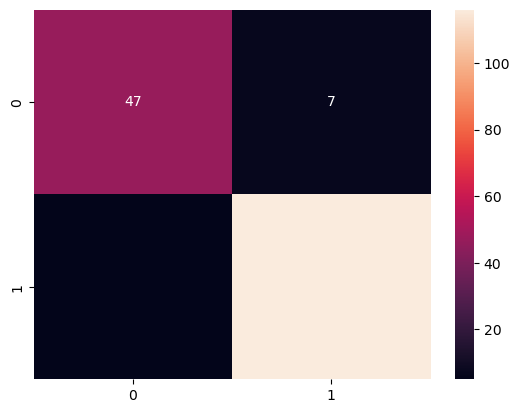

In [50]:
sns.heatmap(confmat_LSVC, annot=True) # Heatmap to visualize confusion matrix for LSVC

### SVC with RBF kernel report

In [51]:
y_predict_RBF = clf_RBF.predict(X_test)
confmat_RBF = confusion_matrix(y_true=y_test, y_pred=y_predict_RBF)
print("Confusion Matrix for SVC with RBF kernel below")
print(confmat_RBF)
print('Precision for SVC with RBF kernel: %.3f' % precision_score(y_true=y_test, y_pred=y_predict_RBF))
print('Recall for SVC with RBF kernel: %.3f' % recall_score(y_true=y_test, y_pred=y_predict_RBF))
print('F1 score for SVC with RBF kernel: %.3f' % f1_score(y_true=y_test, y_pred=y_predict_RBF))
print('Accuracy of SVF with RBF kernel classifier on training set: {:.2f}%'
     .format(clf_RBF.score(X_train, y_train)*100))
print('Accuracy of SVC with RBF classifier on validation set: {:.2f}%'
     .format(clf_RBF.score(X_val, y_val)*100))
print('Accuracy of SVC with RBF kernel classifier on test set: {:.2f}%'
     .format(clf_RBF.score(X_test, y_test)*100))

Confusion Matrix for SVC with RBF kernel below
[[ 37  17]
 [  3 118]]
Precision for SVC with RBF kernel: 0.874
Recall for SVC with RBF kernel: 0.975
F1 score for SVC with RBF kernel: 0.922
Accuracy of SVF with RBF kernel classifier on training set: 87.60%
Accuracy of SVC with RBF classifier on validation set: 85.14%
Accuracy of SVC with RBF kernel classifier on test set: 88.57%


<Axes: >

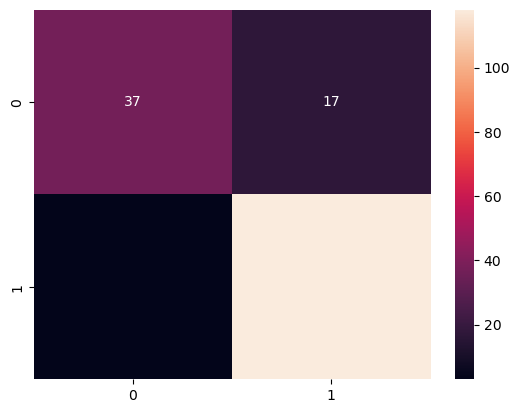

In [52]:
sns.heatmap(confmat_RBF, annot=True) # Heatmap to visualize confusion matrix for SVC with RBF kernel